In [27]:
# book scraping
from bs4 import BeautifulSoup
import pprint
from textblob import TextBlob
import csv
# dataframes
import pandas as pd
import numpy as np
# visualizations
import matplotlib as plt
import seaborn as sns
from IPython.display import Image
# twitter api
import requests
from requests_oauthlib import OAuth1
import cnfg
import tweepy

%matplotlib inline

In [9]:
class QuoteID(object):

    def __init__(self, quote, speaker, sentiment, polarity):
        self.quote = quote
        self.speaker = speaker
        self.sentiment = sentiment
        self.polarity = polarity

url = '/media/bf2398/Disk2_Linux_Mint/home/bf2398/book-nlp/data/output/harrypotter/book.id.html'
soup = BeautifulSoup(open(url),"html5lib")

quote_id_list = []
for quote in soup.find_all(class_='bookquote'):
    split = quote.text.split("\'\'")

    # set line and character variables
    # conditional for when there are multiple single quote separators
    if(len(split)>2):
        line = (split[0].replace("``","").replace("\n"," ").strip()+' '+
                split[1].replace("``","").replace("\n"," ").strip()
               )
        character = split[2].replace("(","").replace(")","").strip()
    else:
        line = split[0].replace("``","").replace("\n"," ").strip()
        character = split[1].replace("(","").replace(")","").replace("\n"," ").strip()

    # set sentiment analysis variables
    sent, pol = TextBlob(line).sentiment
    # add QuoteID object to list
    quote_id_list.append([line,character, sent, pol])

"""
#### Finding the unique speakers in a list:
#### Need to update for list instead of Quote_ID class

unique_speakers = set()
totalwords=0
for quote in quote_id_list:
   unique_speakers.add(quote.speaker)
   totalwords+=len(quote.quote)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(unique_speakers)
print(totalwords)
"""
"""
#### Printout of the sentiment and polarity
#### Need to update for list instead of Quote_ID class

for quote in quote_id_list:
    print("Name: "+ quote.speaker + "\n" +
          "Quote: "+ quote.quote + "\n" +
          "Sentiment and Polarity: " + str(quote.sentiment) + " " + str(quote.polarity)
          )
"""


'\n#### Printout of the sentiment and polarity\n#### Need to update for list instead of Quote_ID class\n\nfor quote in quote_id_list:\n    print("Name: "+ quote.speaker + "\n" +\n          "Quote: "+ quote.quote + "\n" +\n          "Sentiment and Polarity: " + str(quote.sentiment) + " " + str(quote.polarity)\n          )\n'

In [10]:
headers = ["line","character","sentiment","polarity"]
df = pd.DataFrame(quote_id_list,columns=headers)

In [11]:
df.character.unique()

array(['Mr. Dursley/Dursley/MR. DURSLEY', 'he', 'passersby', 'Dudley',
       'unknown', 'the weatherman', 'she', 'Mrs. Dursley', 'He',
       'Professor', 'She', 'Dumbledore/Albus Dumbledore/ALBUS DUMBLEDORE',
       'Harry/McGonagall/McGonagall Harry', 'the giant',
       'Hagrid/Rubeus Hagrid', 'people', 'aunt', 'Dursleys', 'Uncle',
       'Petunia/Aunt Petunia', 'The Dursleys', 'Aunt', 'Aunt Petunia',
       'Piers', 'H.', 'Vernon/Uncle Vernon', 'uncle', 'mother', "'  he",
       'A man', 'the stranger', 'everyone', 'Harry', 'a toad PARENTS',
       'the bartender', 'the bartender Potter honor',
       'Dedalus Diggle/Diggle', 'Doris Crockford', 'Owl', 'The goblin',
       'the boy', 'Madam Malkin', 'Mr. Ollivander/Ollivander', 'the boys',
       'a girl', 'a boy', 'The boy', 'the twins', 'the twin', 'The boys',
       'Harry twins', 'Ron', 'Percy/Weasley/Percy Weasley', 'The twins',
       'The Weasleys', 'him', 'woman', 'the girl',
       'Hermione/Hermione Granger', 'Neville', '

In [12]:
df[df.character=='werewolf']

,line,character,sentiment,polarity
1355,He (Snape)'s not exactly recent if he (Snape)'...,werewolf,0.0,0.25


In [13]:
character_house_dict = {
    'Mr. Dursley/Dursley/MR. DURSLEY': 'muggle', 
    'he': 'unknown', 
    'passersby': 'muggle', 
    'Dudley': 'muggle', 
    'unknown': 'unknown', 
    'the weatherman': 'muggle', 
    'she': 'unknown', 
    'Mrs. Dursley': 'muggle',
    'He': 'unknown', 
    'Professor': 'gryffindor', 
    'She': 'unknown', 
    'Dumbledore/Albus Dumbledore/ALBUS DUMBLEDORE': 'gryffindor',
    'Harry/McGonagall/McGonagall Harry': 'gryffindor', 
    'the giant': 'gryffindor', 
    'Hagrid/Rubeus Hagrid': 'gryffindor', 
    'people': 'unknown',
    'Ravenclaw': 'ravenclaw',
    'aunt': 'muggle', 
    'Dursleys': 'muggle', 
    'Uncle': 'muggle',
    'Petunia/Aunt Petunia': 'muggle', 
    'The Dursleys': 'muggle', 
    'Aunt': 'muggle', 
    'Aunt Petunia': 'muggle', 
    'Piers': 'muggle', 
    'H.': 'gryffindor', 
    'Vernon/Uncle Vernon': 'muggle', 
    'uncle': 'muggle',
    'mother': 'unknown', 
    "'  he": 'gryffindor', 
    'A man': 'unknown', 
    'the stranger': 'unknown', 
    'everyone': 'unknown', 
    'Harry': 'gryffindor', 
    'a toad PARENTS': 'gryffindor', 
    'the bartender': 'slytherin', 
    'the bartender Potter honor': 'slytherin', 
    'Dedalus Diggle/Diggle': 'unknown', 
    'Doris Crockford': 'unknown', 
    'Owl': 'unknown', 
    'The goblin': 'unknown',
    'the boy': 'unknown', 
    'Madam Malkin': 'unknown', 
    'Mr. Ollivander/Ollivander': 'ravenclaw', 
    'the boys': 'unknown',
    'a girl': 'unknown', 
    'a boy': 'unknown', 
    'The boy': 'unknown', 
    'the twins': 'gryffindor', 
    'the twin': 'gryffindor', 
    'The boys': 'unknown', 
    'Harry twins': 'gryffindor', 
    'Ron': 'gryffindor', 
    'Percy/Weasley/Percy Weasley': 'gryffindor', 
    'The twins': 'gryffindor', 
    'The Weasleys': 'gryffindor', 
    'him': 'unknown', 
    'woman': 'unknown', 
    'the girl': 'unknown', 
    'Hermione/Hermione Granger': 'gryffindor', 
    'Neville': 'gryffindor', 
    'Fat': 'hufflepuff', 
    'A people': 'unknown', 
    'the Friar': 'hufflepuff', 
    'A girl': 'unknown', 
    'Susan': 'ravenclaw',
    'Bulstrode Millicent a Slytherin': 'slytherin', 
    'Malfoy/Draco Malfoy': 'slytherin', 
    'girls': 'unknown',
    'Potter/Harry Potter/Mr. Potter': 'gryffindor', 
    'the ghost': 'gryffindor', 
    'Sir Nicholas': 'gryffindor', 
    'Nick': 'gryffindor', 
    'Seamus/Seamus Finnigan': 'gryffindor', 
    'The others': 'gryffindor', 
    'Everybody': 'miscellaneous', 
    'Gryffindor': 'gryffindor', 
    'a man': 'unknown', 
    'a woman': 'unknown', 
    'Snape': 'slytherin', 
    'Fitch': 'miscellaneous',
    'Wood/Oliver Wood/Oliver': 'gryffindor', 
    'Fred/Fred Weasley/Weasley': 'gryffindor', 
    'George/George Weasley': 'gryffindor', 
    'Mrs. Norris': 'miscellaneous', 
    'Crabbe': 'slytherin', 
    'groups': 'unknown', 
    'the Hufflepuffs': 'hufflepuff', 
    'a scream': 'hufflepuff', 
    'Angelina': 'gryffindor', 
    'Slytherin': 'slytherin', 
    'the Gryffindors': 'gryffindor', 
    'Dean/Dean Thomas/Thomas': 'gryffindor', 
    'Lee Jordan/Lee/Jordan': 'gryffindor', 
    'The Slytherins': 'slytherin', 
    'Flint': 'slytherin', 
    'Malfoys': 'slytherin', 
    'G.': 'unknown',
    'werewolf': 'unknown', 
    'Someone': 'unknown', 
    'the teachers': 'unknown', 
    'Hagrid': 'gryffindor', 
    'Fang': 'gryffindor', 
    'The baby': 'unknown',
    'someone': 'unknown', 
    'Mr. Filch/Filch': 'miscellaneous', 
    'Malfoy': 'unknown',
    'a man horse': 'miscellaneous', 
    'Ronan': 'miscellaneous',
    'the centaur': 'miscellaneous', 
    'The centaur': 'miscellaneous', 
    'Firenze': 'miscellaneous', 
    'Flitwick': 'ravenclaw', 
    'I': 'unknown',
    'Norbert/NORBERT': 'unknown', 
    'the midst': 'unknown', 
    'The knight': 'unknown', 
    'knight': 'unknown', 
    'men': 'unknown',
    'The queen': 'unknown', 
    'Quirrell': 'ravenclaw', 
    'All Harry': 'gryffindor', 
    'Voldemort/Lord Voldemort': 'slytherin',
    'the prefects': 'unknown', 
    'all students': 'unknown', 
    'Ginny': 'gryffindor', 
    'Mrs. Weasley': 'gryffindor'
}

In [14]:
df['house'] = df.character.apply(lambda x: character_house_dict[x])

In [15]:
df['house'].unique()

array(['muggle', 'unknown', 'gryffindor', 'slytherin', 'ravenclaw',
       'hufflepuff', 'miscellaneous'], dtype=object)

In [17]:
df.groupby(['character','house'])['sentiment','polarity'].mean().reset_index()

,character,house,sentiment,polarity
0,' he,gryffindor,0.000000,0.000000
1,A girl,unknown,0.000000,0.000000
2,A man,unknown,0.598214,0.717857
3,A people,unknown,0.000000,0.000000
4,All Harry,gryffindor,0.050000,0.500000
5,Angelina,gryffindor,0.000000,0.000000
6,Aunt,muggle,-0.200000,0.250000
7,Aunt Petunia,muggle,0.068182,0.227273
8,Bulstrode Millicent a Slytherin,slytherin,0.000000,0.000000
9,Crabbe,slytherin,0.000000,0.000000


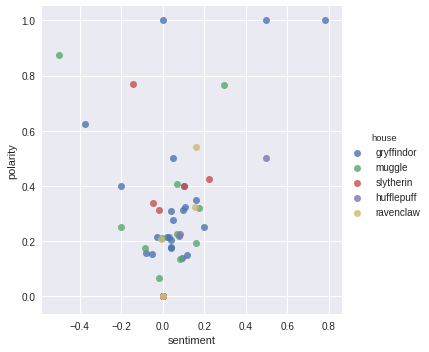

In [21]:
sns.lmplot(x='sentiment',
           y='polarity',
           hue='house',
           data= df[(df.house!='unknown') & (df.house!='miscellaneous')].groupby(['character','house'])['sentiment','polarity'].mean().reset_index(),
           fit_reg=False)

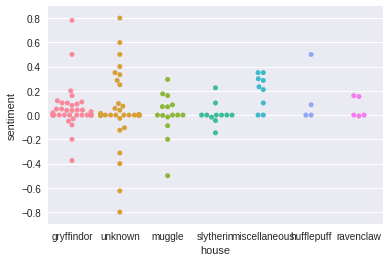

In [23]:
sns.swarmplot(x="house", 
              y="sentiment", 
              data=df.groupby(['character','house'])['sentiment','polarity'].mean().reset_index());

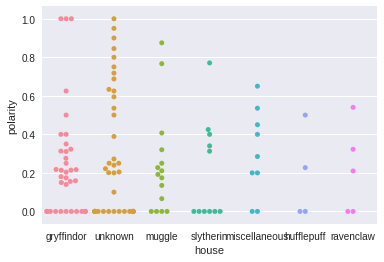

In [22]:
sns.swarmplot(x="house", 
              y="polarity", 
              data=df.groupby(['character','house'])['sentiment','polarity'].mean().reset_index());

In [29]:
auth = tweepy.OAuthHandler(config["consumer_key"],
                           config["consumer_secret"])
auth.set_access_token(config["access_token"],
                      config["access_token_secret"])

api=tweepy.API(auth)

In [ ]:
for tweet in tweets:
    print(tweet['text'])

In [41]:
### Kanye West Analysis

In [32]:
new_tweets = api.user_timeline(screen_name = 'OfficiaIKanye',count=200)

In [40]:
for tweet in new_tweets:
    sent, pol = TextBlob(tweet).sentiment
    
    print(tweet.text+'\n\n')

https://t.co/jfQs9BE3ww


please avoid trying to talk me out of being me in the future


If rather be a friendless loser than have a bunch of fake friends


In order for you to insult me I would first have to value your opinion.


Dinner with Ralph Lauren https://t.co/EtjFXEmvPI


They scream out my failures but whisper my accomplishments


The prettiest people do the ugliest things


If you ain't on my level you under me....


https://t.co/4lbnB4eLmM


I am a man of my word


Mr. and Mrs. West https://t.co/BC6sCScxaO


I miss the old Kanye


Hoppin' out tha mothafuckin' porsche https://t.co/bePTrw6UgD


Not everyone likes me, but not everyone matters...


Don't hide from the truth because it is the only light.


I don't talk to my best friends every single day. You don't have to either. stop guilt tripping your homies. grown folks have busy lives.


You can't have a better tomorrow if your still thinking about yesterday


disgusted by the amount of people who use others for short term